<a href="https://colab.research.google.com/github/afscomercial/notebook/blob/main/jupyter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import zipfile

In [2]:
!wget --no-check-certificate https://storage.googleapis.com/platzi-tf2/databasesLoadData.zip -O /tmp/databasesLoadData.zip

--2024-04-18 03:37:36--  https://storage.googleapis.com/platzi-tf2/databasesLoadData.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.8.207, 142.251.170.207, 173.194.174.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.8.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71662510 (68M) [application/zip]
Saving to: ‘/tmp/databasesLoadData.zip’

/tmp/databasesLoadD 100%[===================>]  68.34M  18.9MB/s    in 3.9s    

2024-04-18 03:37:40 (17.4 MB/s) - ‘/tmp/databasesLoadData.zip’ saved [71662510/71662510]



In [3]:
local_zip= "/tmp/databasesLoadData.zip"
zip_ref = zipfile.ZipFile(local_zip,"r")
zip_ref.extractall("/tmp/databasesLoadData")
zip_ref.close()

In [4]:
import json
import codecs
import requests
import numpy as np
from PIL import Image
from io import BytesIO
%matplotlib inline
import matplotlib.pyplot as plt


In [8]:
url = "/tmp/databasesLoadData/sign_mnist_json/data.json"

In [10]:
data_json = []
with codecs.open(url, "rU", "utf-8") as js:
    for line in js:
        data_json.append(json.loads(line))

print("{} image found".format(len(data_json)))

9 image found


In [11]:
images = []

for data in data_json:
    response = requests.get(data["content"])
    img = np.asarray(Image.open(BytesIO(response.content)))
    images.append([img, data["label"]])

b


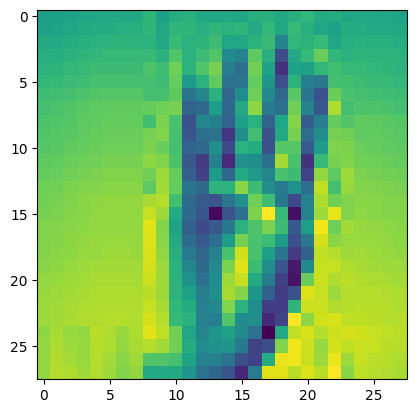

In [14]:
plt.imshow(images[0][0].reshape(28,28))
print(images[0][1])

In [5]:
import base64

In [6]:
url = "/tmp/databasesLoadData/sign_mnist_base64/data.json"

In [7]:
with open(url) as f:
  data = json.load(f)

In [8]:
print(data)

{'b': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/wAALCAAcABwBAREA/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/9oACAEBAAA/AOhS246VBdyJbqyDmbaGVSOuWxTUk3XckDKcGVkjI/2VBOf1qcwc9K00i4rnNbCLrcSPMkQKJ97PUNnHHtmrllEf7US3dSJIEklcEdd7DBHtjP5VrGLmrSpxWHewQnxNHNOBsAJOfYZpvh8zXup394xPkKBAg9SDk/lx+db5j5pCcICO+K47X7+cL5uRv2kZxXW6TaRWek20UIIBQOSepZhkk/iasMxDV//Z'}


In [9]:
base64_img_bytes = data['b'].encode('utf-8')
path_img = "/tmp/decoded_images.png"
with open(path_img, "wb") as file_to_save:
  decoded_image_data = base64.decodebytes(base64_img_bytes)
  file_to_save.write(decoded_image_data)

In [10]:
img = Image.open(path_img)
img

In [11]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns

In [12]:
train = pd.read_csv("/tmp/databasesLoadData/sign_mnist_train/sign_mnist_train.csv")
test = pd.read_csv("/tmp/databasesLoadData/sign_mnist_test/sign_mnist_test.csv")

In [13]:
labels = train['label'].values

In [17]:
train.drop('label', axis = 1, inplace = True)

In [18]:
images = train.values

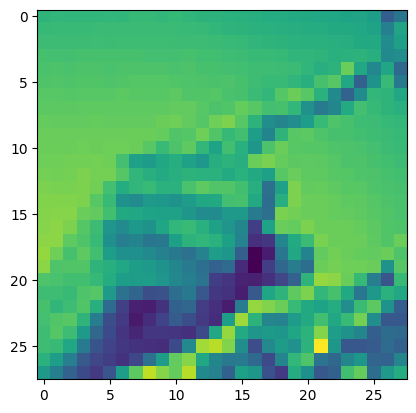

In [19]:
plt.imshow(images[1].reshape(28, 28))